### 1. 목표
- 타이타닉 데이터를 활용하여 생존자 예측 모델을 만들어보자!
- kaggle 경진대회에서 높은 점수를 달성해보자~
- 머신러닝의 전체과정을 이해해보자!

### 2.데이터 수집
- kaggle 에서 제공해주는 데이터 불러오기

In [2]:
# 라이브러리 불러오기
import numpy as np # 수치계산용 라이브러리
import pandas as pd # 행과 열을 가지는 표와같은 형태를 다루는 라이브러리
import matplotlib.pyplot as plt # 시각화 라이브러리
import seaborn as sns # 시각화라이브러리 -> pandas 호환성이 높은 라이브러리
# 색감다양, 다양한 그래프를 출력해볼 수 있음

In [3]:
a = [1,2,3,4]
a + a

[1, 2, 3, 4, 1, 2, 3, 4]

In [4]:
arr_a = np.array(a)
arr_a + arr_a
# 넘파이 배열은 요소별 연산이 가능하다

array([2, 4, 6, 8])

In [5]:
# train, test 
# 조건 : PassengerId 컬럼을 인덱스로 변경하여 불러오기!
train = pd.read_csv('data/train.csv', index_col='PassengerId')
test = pd.read_csv('data/test.csv', index_col='PassengerId')

In [6]:
# 데이터 크기확인
print(train.shape, test.shape)
# train: 10개 특성 ,1개의 정답
# test: 10개 특성

(891, 11) (418, 10)


In [7]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [9]:
# train 정보확인
train.info()
# 결측치여부
# 데이터타입

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


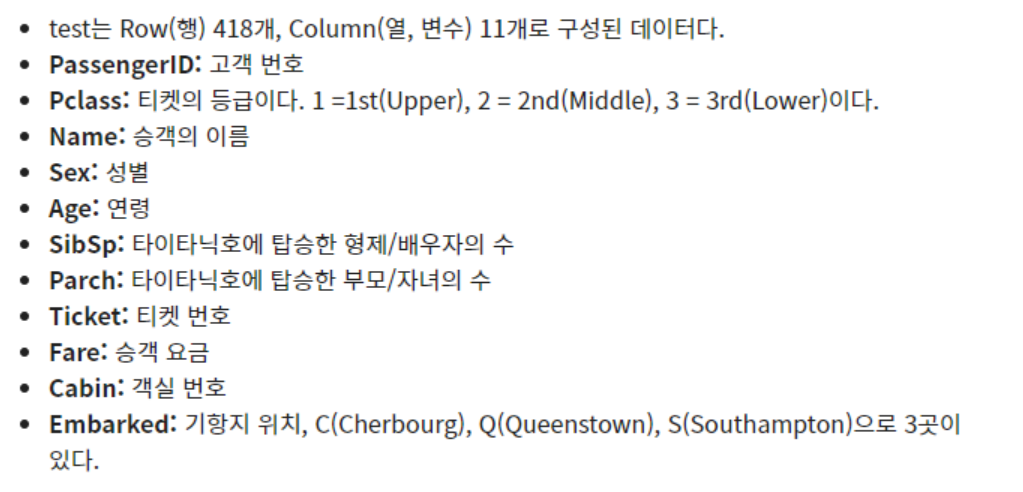

### 3. 데이터 전처리

##### 결측치 여부 확인
- train
    - Age
    - Cabin
    - Embarked
- test
    - Age
    - Fare
    - Cabin
- 단순 기술통계량으로 결측치를 채우지 않고 각 컬럼간의 상관관계를 파악하여 채워보자!

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- train -> Age 결측치 채우기!
    - 나이 데이터는 주로 평균값으로 결측치를 채움
    - 기술통계량을 확인해 봤을때 전체적인 나이가 앞쪽으로 치우쳐져있는것을 확인(모델의 신뢰성이 낮아질 수 있음)
    - 다른 컬럼들과의 상관관계를 확인하여 결측치를 상세하게 채워보자!

In [11]:
train['Age'].mean()

29.69911764705882

In [12]:
# 나이데이터의 기술통계량 확인
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- 절대값으로 1에 가까울수록 상관관계가 높다!
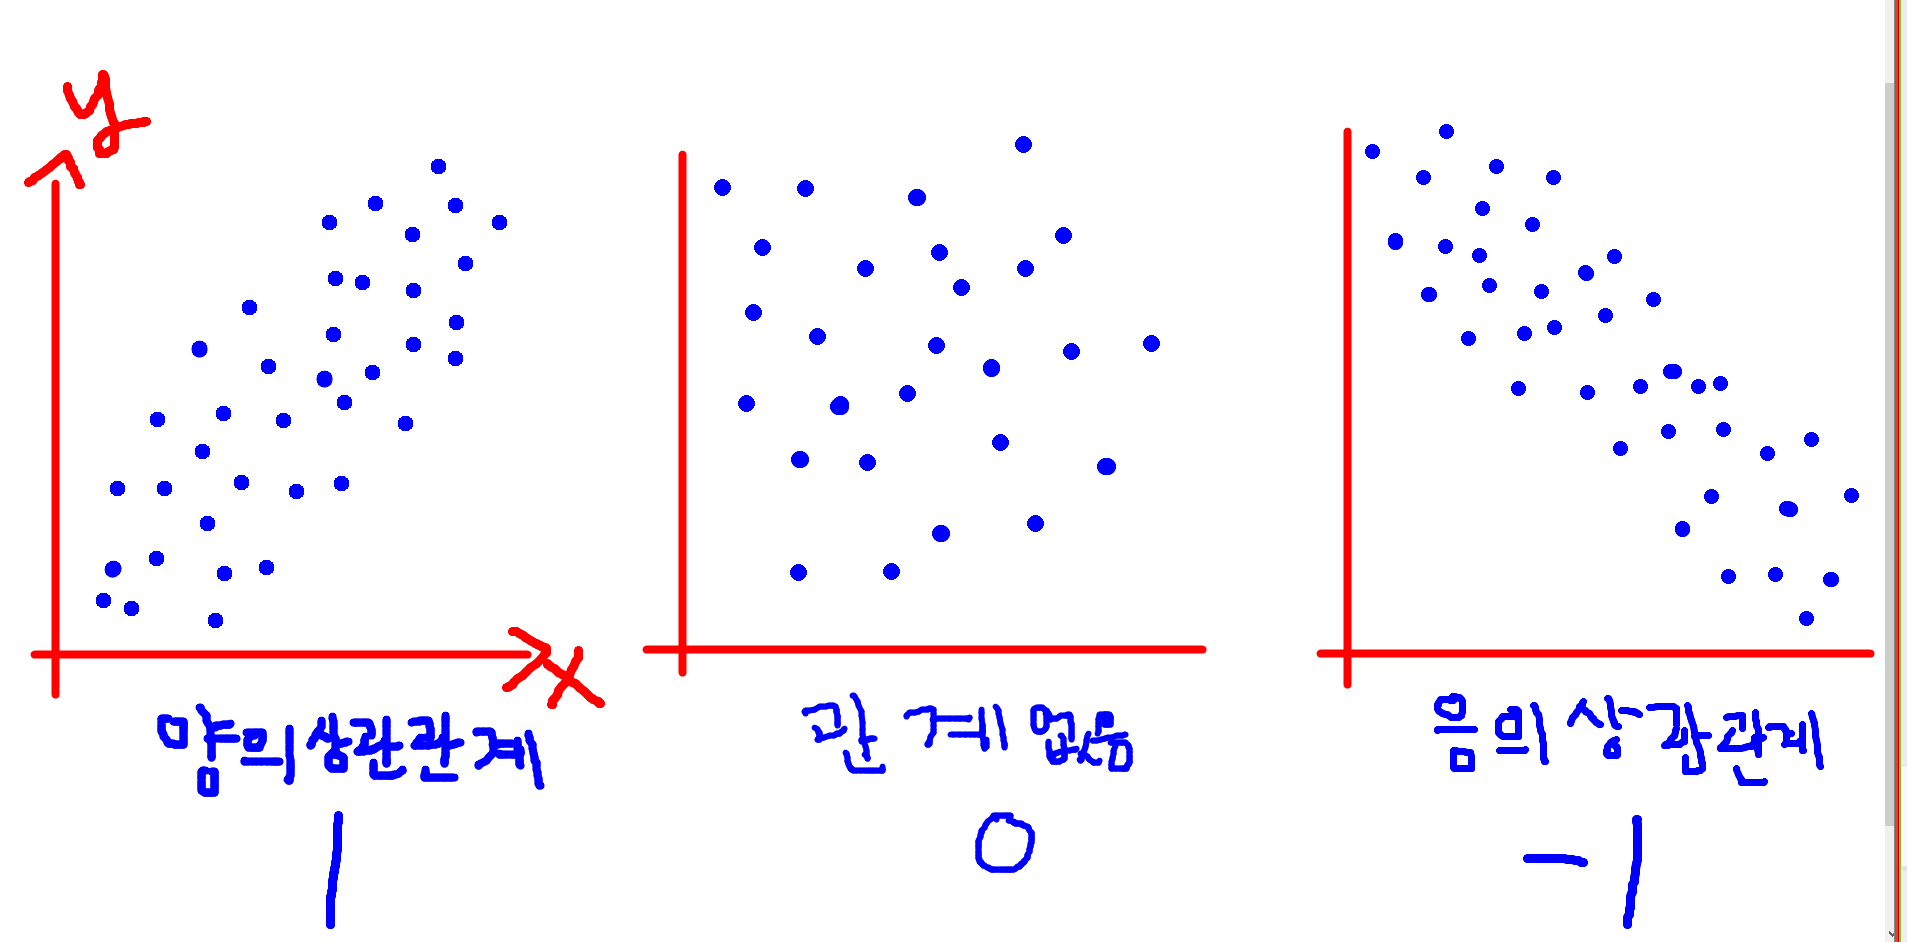

In [13]:
train.corr(numeric_only=True)
# -1~1 사이의 값을 가지며 
# 절대값으로! 1에 가까울수록 높은 상관관계를 가진다
# 0에 가까울수록 관계가 없음을 의미

# Age 컬럼과 상관관계가 높은 Pclass 컬럼을 활용

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [14]:
# 피봇테이블 -> 컬럼들 간의 요약된 정보를 출력할 수 있는 테이블형태의 데이터
# Age 평균값을 구할건데 , Pclass, Sex 에 따른 평균값
pt1 = train.pivot_table(values='Age', # 데이터로 사용될 컬럼
                 index = ['Pclass','Sex'], # 데이터 요약시 사용할 컬럼
                 aggfunc='mean') # 그룹별로 조회할 함수 (sum, mean, count)
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [15]:
# 다중인덱싱/멀티인덱싱 -> 두개 이상의 인덱스가 있을때 값 가져오는 방법
#df.loc[(앞인덱스, 뒤인덱스), 컬럼명]
# 1등급 여자의 나이
pt1.loc[(1,'female'), 'Age']

34.61176470588235

In [16]:
# 2등급 남자의 나이
pt1.loc[(2,'male'),'Age']

30.74070707070707

In [17]:
# 3등급 여자의 나이
pt1.loc[(3,'female'),'Age']

21.75

In [18]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [19]:
# 나이 결측치를 출력해주는 기능 함수화
def fill_age (data):
    if pd.isna(data['Age']): # Age 컬럼에 결측치가 있다면?
        return pt1.loc[(data['Pclass'],data['Sex']),'Age'] # Pclass, Sex 맞는 나이값 출력
    else: # 결측치가 없다면?
        return data['Age'] # 원래 Age 컬럼에 있는 값을 출력

In [20]:
# apply 함수: DataFrame 에 함수를 적용하기위해 사용함
# DataFrame.apply(함수명, 축설정)

In [21]:
# train의 Age 컬럼에 위의 함수를 통해 출력된 값으로 업데이트
train['Age'] = train.apply(fill_age, axis = 1).astype('int64')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


- test -> Age 컬럼 결측치 채우기

In [23]:
# test -> Age 결측치 채워보기!
test['Age'] = test.apply(fill_age, axis = 1).astype('int64')

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


- train -> Embarked 컬럼 결측치 채우기

In [25]:
train.info()
# train Embarked 컬럼의 결측치는 단 2개

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [26]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
train['Embarked'].count()

889

In [28]:
train['Embarked'].value_counts()
# 결측치가 2개 뿐이고 S 데이터가 압도적으로 많기 때문에
# 결측치 S 항구로 채워주기
# 데이터가 많으면 많을수록 한두개의 데이터는 큰영향을 끼치지 않음

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [29]:
# test 데이터도 확인
test['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [30]:
# 결측치를 내가 원하는 값으로 채워주는 함수
# 채워주고싶은 df.fillna(값)
train['Embarked'] = train['Embarked'].fillna('S')

In [31]:
train.info()
# Embarked 컬럼 결측치 채우기 완료~

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


- test -> Fare 요금 결측치 채우기

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [33]:
test['Fare'].describe()
# 평균 35 최대값 512 앞쪽에 몰려있는것을 확인
# Fare 전체 평균으로 채우기에는 신뢰성이 떨어질것같음

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [34]:
# Fare 컬럼 상관관계 확인
train.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.066538,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.410104,0.083081,0.018443,-0.549500
Age,-0.066538,-0.410104,1.000000,-0.251439,-0.178855,0.120173
SibSp,-0.035322,0.083081,-0.251439,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.178855,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.120173,0.159651,0.216225,1.000000


In [35]:
# Fare 컬럼과 관련이 높은 Pcalss, Sex 가져와서 결측치 채우기!
# 피봇테이블
# Fare 평균값 (Pclass, Sex 에 따른) -> pt2
pt2 = test.pivot_table(values='Fare',
                index = ['Pclass','Sex'],
                aggfunc='mean')
pt2

Fare
Pclass Sex               
1      female  115.591168
       male     75.586551
2      female   26.438750
       male     20.184654
3      female   13.735129
       male     11.826350

In [36]:
# 비어있는 값이 1개이기때문에 함수생성 X
# test 에서 결측가 있는 행을 찾아서 직접 넣어주자!
# test 에서 Fare 컬럼이 비어있는 행 찾아오기!
# 불리언인덱싱 : 조건에 맞는 데이터만 추출 
# 데이터[조건]  -> 조건이 True 값만 추출

# 비어있는 값 확인 : isna()
test[test['Fare'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [37]:
# 3등급이면서 남자의 요금 평균 : 11.826350
# Fare에 결측치에 채워주기
test['Fare'] = test['Fare'].fillna(11.826350)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


##### 불리언 인덱싱 복습

In [39]:
# Age 나이가 50세 이상인 데이터 출력
test[test['Age'] >= 50]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.68750,NaN,Q
905,2,"Howard, Mr. Benjamin",male,63,1,0,24065,26.00000,NaN,S
912,1,"Rothschild, Mr. Martin",male,55,1,0,PC 17603,59.40000,NaN,C
917,3,"Robins, Mr. Alexander A",male,50,1,0,A/5. 3337,14.50000,NaN,S
922,2,"Louch, Mr. Charles Alexander",male,50,1,0,SC/AH 3085,26.00000,NaN,S
940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60,0,0,11813,76.29170,D15,C
961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60,1,4,19950,263.00000,C23 C25 C27,S
969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55,2,0,11770,25.70000,C101,S
973,1,"Straus, Mr. Isidor",male,67,1,0,PC 17483,221.77920,C55 C57,S


In [40]:
# Sex 성별이 여자인 사람만 출력
test[test['Sex'] == 'female']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S
898,3,"Connolly, Miss. Kate",female,30,0,0,330972,7.6292,NaN,Q
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18,0,0,2657,7.2292,NaN,C
904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23,1,0,21228,82.2667,B45,S
...,...,...,...,...,...,...,...,...,...,...
1301,3,"Peacock, Miss. Treasteall",female,3,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
1302,3,"Naughton, Miss. Hannah",female,21,0,0,365237,7.7500,NaN,Q
1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37,1,0,19928,90.0000,C78,Q


In [41]:
score = [70,56,21,80,90,95]
np_score = np.array(score)
np_score

array([70, 56, 21, 80, 90, 95])

In [42]:
# 점수가 80점 이상인 데이터만 출력
np_score[np_score >= 80]

array([80, 90, 95])

- Cabin 결측치 처리 ( train, test 둘다 결측치가 있다)

In [43]:
train['Cabin'].count()
# 전체데이터 891개
# 있는데이터 204개
# 결측치 687개
# 실제데이터보다 결측치가 더 많음 -> 컬럼을 삭제하는것도 하나의 방법

204

In [44]:
train['Cabin'].unique()
# 유일한 값들을 확인해봤을때 규칙을 찾기!
# 알파벳을 활용해보자! -> 층수

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [45]:
# train, test 알파벳으로 데이터를 변경
# 결측치가 있는 데이터들에는 'M' 이라는 임의의 알파벳으로 채워주고 가자
train['Deck'] = train['Cabin'].fillna('M')
test['Deck'] = test['Cabin'].fillna('M')
# 임의의 문자로 채워주는 이유는 결측치가 너무 많기 때문에
# 결측치를 가지고 있는 사람들의 패턴을 파악하기위해
# 시각화를 통해서 결측치들의 규칙 확인

In [46]:
# 'Deck' 컬럼에는 알파벳만을 담아주기~ (첫번째 문자열만 추출)
train['Deck'] = train['Deck'].str[0]
test['Deck'] = test['Deck'].str[0]

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


In [48]:
# Cabin 컬럼 삭제
train.drop('Cabin', axis = 1, inplace = True)

In [49]:
test.drop('Cabin', axis = 1, inplace = True)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


- Deck 컬럼의 M 데이터의 패턴 확인

In [52]:
# 피봇테이블
# Deck 별로 산사람, 죽은사람의 수를 count
train.pivot_table(values = 'Name',
                 index=['Deck','Survived'],
                 aggfunc='count')
# M 데이터를 가진사람들중 산사람보다 죽은사람의 비율이 높다 (2배)

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

<Axes: xlabel='Deck', ylabel='count'>

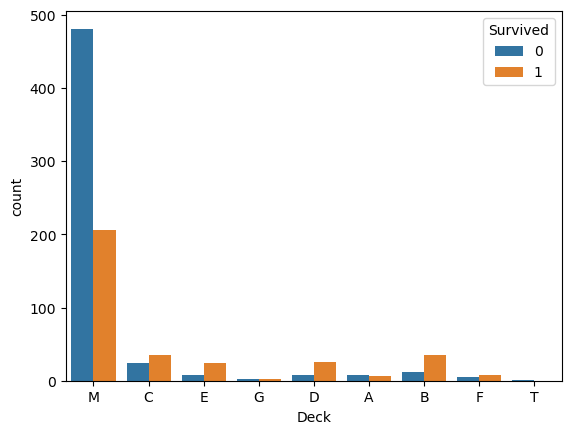

In [53]:
# 시각화로 확인하기
sns.countplot(data = train,
             x = 'Deck',
             hue = 'Survived')
# M 에 죽은사람이 많음
# 생존여부를 파악하는데 활용해도 괜찮겠군!

<Axes: xlabel='Pclass', ylabel='count'>

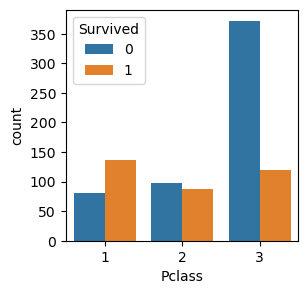

In [54]:
# Pclass 에 따른 생존비율 시각화
plt.figure(figsize=(3,3))
sns.countplot(data = train,
             x = 'Pclass',
             hue = 'Survived')
# 1등급 - 생존률이 높음
# 2등급 - 비교적 사망률이 높음
# 3등급 - 월등히 사망률이 높음

<Axes: xlabel='Deck', ylabel='count'>

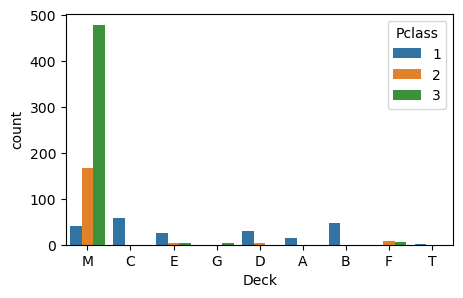

In [55]:
# x: Deck , hue: Pclass
plt.figure(figsize=(5,3))

sns.countplot(data = train,
             x = 'Deck',
             hue = 'Pclass')
# 결측치(M) 인 사람이 3등급인 확률이 높구나

<Axes: xlabel='Embarked', ylabel='count'>

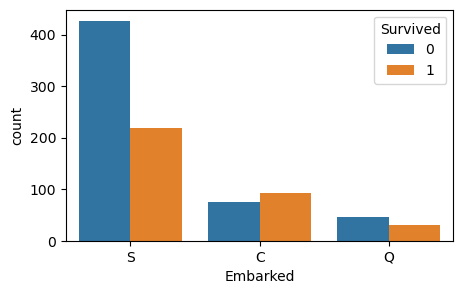

In [56]:
# 탑승 항구에 따른 생존여부
# 해석
plt.figure(figsize=(5,3))
sns.countplot(data = train,
             x = 'Embarked',
             hue = 'Survived')
# S 항구에서 탑승한 승객이 사망률이 높음
# C 항구 탑승객은 생존률이 높음
# Q 항구 탑승객은 사망률이 비교적 높은

<Axes: xlabel='Sex', ylabel='count'>

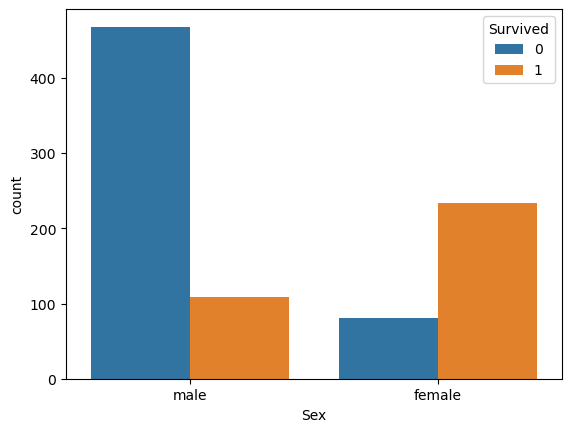

In [57]:
# 성별에 따른 생존여부
#해석
sns.countplot(data = train,
             x = 'Sex',
             hue = 'Survived')
# 남자가 많이 사망했구나ㅠㅠ

<Axes: xlabel='Age', ylabel='count'>

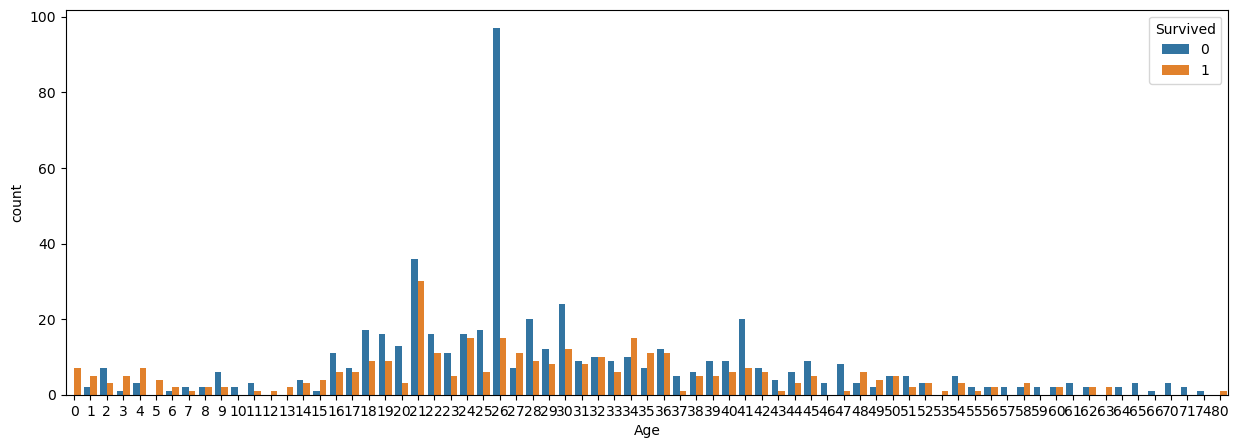

In [58]:
# 나이에 따른 생존여부
# 해석
plt.figure(figsize = (15,5))
sns.countplot(data = train,
             x='Age',
             hue = 'Survived')
# 연속적인 수치형 데이터를 확인할떄 막대그래프로 그리면 큰의미가 없게된다
# 수치형의 데이터는 분포, 밀도를 확인할 수 있는 그래프로 표현

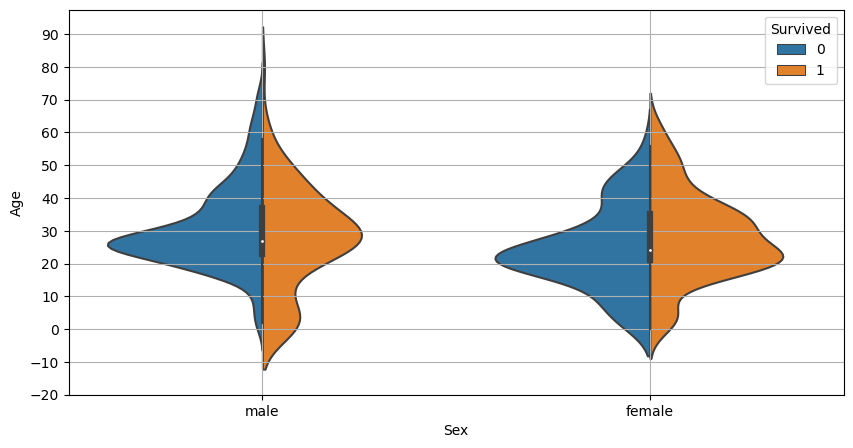

In [59]:
# 바이올린 플롯: 바이올린형태로 데이터의 분포와 밀도를 보기쉽게 곡선으로 표현
# 데이터가 많을수록 두껍게 표현, 적을수록 얇게 표현
plt.figure(figsize=(10,5))
sns.violinplot(data = train,
              x = 'Sex',
              y = 'Age',
              hue = 'Survived',
              split = True)
plt.yticks(range(-20,100,10))
plt.grid()
# 20대부터 40대 까지의 분포 넓은 -> 탑승자가 많음
# 20대부터 40대 사망자가 많음
# 어린아이들 중에서는 남자아이가 여자아이보다 생존률이 높음

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
 10  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


##### 특성공학: 새로운 컬럼을 생성,추출
- Parch: 함께 탑승한 부모,자식의 수
- SibSp: 함께 탑승한 형제, 자매, 배우자의 수
    - 위 두개의 데이터를 보면 동승자 개념 -> 비슷한 데이터
    - 부모,자식,형제,자매,배우자를 합쳐서 "가족의 수" 컬럼을 생성
    - train, test 둘다 생성

In [61]:
train['Parch']

PassengerId
1      0
2      0
3      0
4      0
5      0
      ..
887    0
888    0
889    2
890    0
891    0
Name: Parch, Length: 891, dtype: int64

In [62]:
train['SibSp']

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    1
890    0
891    0
Name: SibSp, Length: 891, dtype: int64

In [63]:
# 두개의 컬럼을 합해서 가족의 숫자라는 새로운 컬럼을 생성
train['Family_size'] = train['SibSp'] + train['Parch'] + 1 # 자기자신의 수 더해줌
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

<Axes: xlabel='Family_size', ylabel='count'>

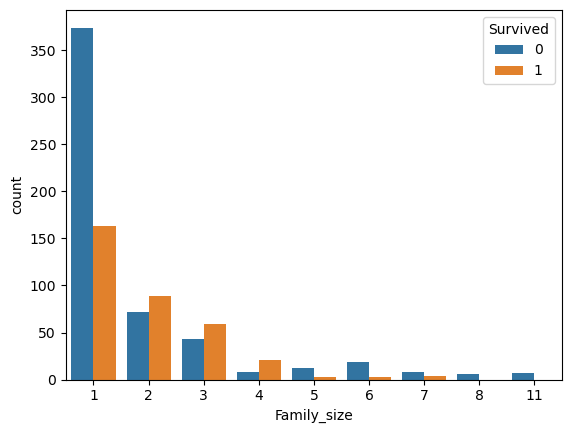

In [64]:
# 시각화
sns.countplot(data = train,
             x = 'Family_size',
             hue = 'Survived')
# 연속적인 데이터의 경우 패턴이 비슷한 데이터들끼리 
# 묶어주어 사소한 관찰의 오류를 줄여주자! -> 학습의 효율성 높여줌

In [65]:
# 연속형 -> 범주화 (binning)
# 데이터, 범위, 각 범위의 라벨
# 범위(나누는 구간설정) 1 , 2~4, 5~11  총 3개의 구간
bins = [0,1,4,11]
# 라벨
labels = ['Alone','Small','Large']
train['Family_size'] = pd.cut(train['Family_size'], bins = bins, labels= labels)
test['Family_size'] = pd.cut(test['Family_size'], bins = bins, labels= labels)

<Axes: xlabel='Family_size', ylabel='count'>

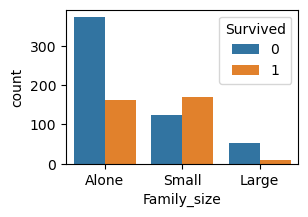

In [66]:
# 그룹화된 Family_size 시각화
plt.figure(figsize=(3,2))
sns.countplot(data = train, x = 'Family_size', hue = 'Survived')
# 같은패턴의 데이터들을 그룹화하여 진행시 사소한 관찰의 오류를 줄일 수 있다

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  Deck         891 non-null    object  
 11  Family_size  891 non-null    category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 84.5+ KB


- Name 데이터 확인

In [68]:
train['Name']
# text 데이터 내에서 규칙찾기 -> 호칭 추출

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [69]:
# 첫번째 승객의 이름만 추출해서 확인
train['Name'][1]
# 이름, 호칭.성 -> 호칭 추출

'Braund, Mr. Owen Harris'

In [70]:
# split(기준이되는 값) -> 잘라서 리스트로 출력
train['Name'][1].split(',')

['Braund', ' Mr. Owen Harris']

In [71]:
# 1번인덱스의 데이터만 추출
train['Name'][1].split(',')[1]

' Mr. Owen Harris'

In [72]:
# . 을 기준으로 분할
train['Name'][1].split(',')[1].split('.')

[' Mr', ' Owen Harris']

In [73]:
# 호칭만을 추출하기위해 0번 인덱스 데이터만 추출
train['Name'][1].split(',')[1].split('.')[0]

' Mr'

In [74]:
# 문자열에서 공백 제거: strip()
train['Name'][1].split(',')[1].split('.')[0].strip()

'Mr'

In [75]:
# 위 작업을 함수화
def split_name (data):
    return data.split(',')[1].split('.')[0].strip()

In [76]:
# Title 새로운 컬럼을 생성 (호칭만을 추출하여 대입)
train['Title'] = train['Name'].apply(split_name)
test['Title'] = test['Name'].apply(split_name)

In [77]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [78]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

(0.0, 10.0)

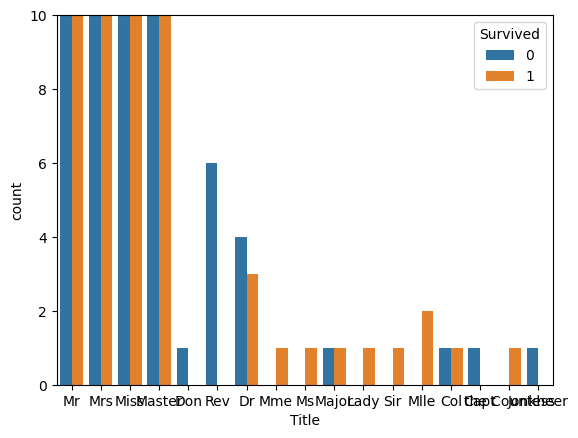

In [79]:
# Title 시각화
#plt.figure(figsize = (10,3))
sns.countplot(data = train, x = 'Title', hue = 'Survived')
plt.ylim(0,10) # 차트출력의 범위 제한

# 개수가 적은 특징들을 others 라는 그룹으로 묶어주기
# Rev(목사님) -> 특정패턴을 보임 전원 사망

In [80]:
len(train['Title'].unique())
# 총 17개의 호칭

17

In [81]:
# map 함수 사용을 위해서 각 호칭에 대응하는 딕셔너리를 생성
title = ['Mr', 'Mrs', 'Miss', 'Master',  'Rev', 'Don','Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer','Dona']
convert_title = ['Mr', 'Mrs', 'Miss', 'Master','Rev'] + ['Other']*13

In [82]:
convert_title

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Rev',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other',
 'Other']

In [83]:
# zip() 함수를 사용해서 2개의 리스트형태 데이터를 연결하여 딕셔너리로 생성
# zip(): 지퍼처럼 두개의 그룹 데이터를 서로 엮어주는 함수
title_dic = dict(zip(title,convert_title))

In [84]:
# map() 함수를 사용하여 key 값에 대응하는 value 값으로 변경
train['Title'] = train['Title'].map(title_dic)

In [85]:
# 잘바뀌었는지 확인
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [86]:
# test 변경
test['Title'] = test['Title'].map(title_dic)

In [87]:
# 확인
test['Title'] .unique()
# train 에는 없지만 test 에는 존재하는 호칭이 있구나!
# 어떤 호칭일까?

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

In [88]:
title_train = title
title_test = ['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona']

In [89]:
# test에는 있지만 train 에는 없는 호칭을 찾기
set(title_test) - set(title_train)
# Dona

set()

In [90]:
# train 에는 있지만 test 에는 없는 호칭
set(title_train) - set(title_test)

{'Capt',
 'Don',
 'Jonkheer',
 'Lady',
 'Major',
 'Mlle',
 'Mme',
 'Sir',
 'the Countess'}

In [91]:
# 딕셔너리에 Dona 라는 값 Other 연결
title_dic['Dona'] = 'Other'

In [92]:
title_dic

{'Mr': 'Mr',
 'Mrs': 'Mrs',
 'Miss': 'Miss',
 'Master': 'Master',
 'Rev': 'Rev',
 'Don': 'Other',
 'Dr': 'Other',
 'Mme': 'Other',
 'Ms': 'Other',
 'Major': 'Other',
 'Lady': 'Other',
 'Sir': 'Other',
 'Mlle': 'Other',
 'Col': 'Other',
 'Capt': 'Other',
 'the Countess': 'Other',
 'Jonkheer': 'Other',
 'Dona': 'Other'}

In [93]:
test['Title'].map(title_dic)

PassengerId
892         Mr
893        Mrs
894         Mr
895         Mr
896        Mrs
         ...  
1305        Mr
1306       NaN
1307        Mr
1308        Mr
1309    Master
Name: Title, Length: 418, dtype: object

In [94]:
test['Title'] = test['Title'].fillna("Other")

In [95]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other', 'Rev'], dtype=object)

<Axes: xlabel='Title', ylabel='count'>

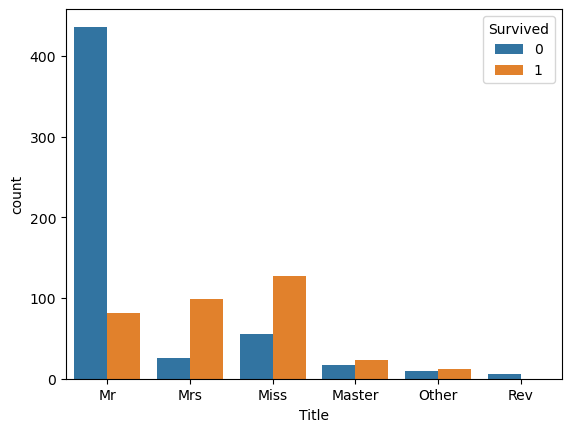

In [96]:
sns.countplot(data = train, x = 'Title',hue = 'Survived')

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  Deck         891 non-null    object  
 11  Family_size  891 non-null    category
 12  Title        891 non-null    object  
dtypes: category(1), float64(1), int64(5), object(6)
memory usage: 123.8+ KB


In [98]:
# Ticket 컬럼 확인
train['Ticket'].unique()
# 티켓번호 -> 규칙찾기 실패 -> 컬럼 제거

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

##### 필요없는 컬럼 삭제
- Name, SibSp, Parch, Ticket

In [99]:
train.drop(['Name','SibSp','Parch','Ticket'], axis = 1, inplace = True)
test.drop(['Name','SibSp','Parch','Ticket'], axis = 1, inplace = True)

In [100]:
# 데이터 크기
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


### 모델링
- 데이터분리
- 모델선택
- 모델학습
- 모델예측
- 모델평가

- 데이터 분리
    - train -> 문제, 정답
        - 문제(X_train): 특성 8개
        - 정답(y_train): Survived 컬럼
    - test -> 문제
        - X_test

In [101]:
# 분리
X_train = train.drop('Survived', axis = 1)
y_train = train['Survived']
X_test = test

In [102]:
# 크기확인
print(X_train.shape, y_train.shape)
print(X_test.shape)

(891, 8) (891,)
(418, 8)


In [103]:
# 원핫인코딩!
# (train,test)
onehot_X_train = pd.get_dummies(X_train)
onehot_X_test = pd.get_dummies(X_test)

In [104]:
# 크기확인
print(onehot_X_train.shape)
print(onehot_X_test.shape)

(891, 26)
(418, 25)


In [105]:
# set() 함수를 활용하여 다른 컬럼을 확인
set(onehot_X_train.columns) - set(onehot_X_test.columns)
# Deck_T 컬럼이 train 에만 존재하는것을 확인
# train['Deck'] 컬럼에만 존재하는 T 라는 알파벳이 있었기때문!!

{'Deck_T'}

In [106]:
# 기계학습을 위해서 X_train과 X_test 의 컬럼수와 순서를 맞춰주어야한다!!
onehot_X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T', 'Family_size_Alone',
       'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev'],
      dtype='object')

In [107]:
# Deck_T 컬럼은 생기지만 실제로 데이터는 없는 경우 (원핫인코딩)
onehot_X_test['Deck_T'] = 0

In [108]:
onehot_X_test.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_size_Alone',
       'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev', 'Deck_T'],
      dtype='object')

In [109]:
# onehot_X_train 에 있는 Deck_T 컬럼을 제일 뒤로 보내주기!

In [110]:
#1. Deck_T 임시변수에 저장하기~
tmp = onehot_X_train['Deck_T']

In [111]:
#2. onehot_X_train 에서 Deck_T 삭제
onehot_X_train.drop("Deck_T", inplace=True, axis = 1)

In [112]:
# 3.onehot_X_train 에 제일 뒤로 tmp 데이터를 병합 (concat -> 축설정)
onehot_X_train = pd.concat([onehot_X_train,tmp], axis = 1)

In [113]:
onehot_X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D',
       'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Family_size_Alone',
       'Family_size_Small', 'Family_size_Large', 'Title_Master', 'Title_Miss',
       'Title_Mr', 'Title_Mrs', 'Title_Other', 'Title_Rev', 'Deck_T'],
      dtype='object')

### 모델링
- knn 모델
- tree 모델

In [114]:
# 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

- knn_model1 (하이퍼파라미터를 조절하지 않은 모델)

In [115]:
# 1. 모델객체생성 (knn_model1) # 분류모델
knn_model1 = KNeighborsClassifier()

In [116]:
# 2. 모델학습 
# model.fit(훈련용문제, 훈련용정답)
knn_model1.fit(onehot_X_train, y_train)

KNeighborsClassifier()

In [117]:
# 2-1 교차검증 # cross_val_score (모델이름, 문제, 정답, 교차검증횟수)
cross_val_score(knn_model1,onehot_X_train.values, y_train, cv = 5).mean()
# 평균 0.71 의 성능을 내는 모델

0.7104764296026616

In [118]:
# 3. 모델예측
# model.predict(테스트용 문제)
pre1 = knn_model1.predict(onehot_X_test.values)

C:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [119]:
# 4. kaggle 제출을 위하여 정답 작성
# gender_submission 파일 불러오기
result_submission = pd.read_csv('data/gender_submission.csv')
result_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [120]:
# 5. 우리가 예측한 정답 덮어 씌워주기!
result_submission['Survived'] = pre1
result_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [121]:
# 6.제출을 위하여 csv 파일 형태로 내보내기!
result_submission.to_csv('data/kaggle_sub_01.csv', index = False)

- tree_model1 (하이퍼파라미터를 조절하지 않은 모델)

In [126]:
# 1. 모델객체생성 (knn_model1, tree_model1)
tree_model1 = DecisionTreeClassifier()

In [128]:
# 2. 모델학습
tree_model1.fit(onehot_X_train, y_train)

DecisionTreeClassifier()

In [131]:
# 2-1 교차검증
cross_val_score(tree_model1, onehot_X_train,y_train, cv=5).mean()
# knn 모델보다는 성능이 조금 더 좋은것을 확인

0.7912434875400163

In [125]:
# 3. 모델예측

- tree_model2 (하이퍼파라미터를 조절한 모델) -> 제출

In [135]:
# 객체생성, 학습, 교차검증
tree_model2 =DecisionTreeClassifier(max_depth=3)
tree_model2.fit(onehot_X_train, y_train)
cross_val_score(tree_model2,onehot_X_train, y_train, cv=5).mean()
# 하이퍼파라미터 조절 후 정확도가 향상된 것을 확인

0.8159249262444291

In [136]:
# 예측 후 제출
pre2 = tree_model2.predict(onehot_X_test)
result_submission2 = pd.read_csv('data/gender_submission.csv')
result_submission2['Survived'] = pre2
result_submission2.to_csv('data/kaggle_02.csv', index = False)

### 모델 성능개선
- 데이터의 양 늘리기
- 전처리 방법 수정
- 더 좋은 성능을 가지는 모델 사용
- 하이퍼파라미터 조절 (약 5% 정도의 변화)
- 정규화, 숫자값의 범위 조정 (scale 조정)
    - 거리계산에 민감한 knn 모델의 성능을 높이기 위해서 스케일 조정을 해줌
    - sklearn 스케일링 도구 제공 -> 사용법 확인

In [138]:
# sklearn 에서 제공하는 scale 도구 불러오기!
from sklearn.preprocessing import StandardScaler

In [140]:
# 스케일러 객체 생성
scaler= StandardScaler()

In [141]:
# 스케일러 학습 (문제데이터)
scaler.fit(onehot_X_train)

StandardScaler()

In [143]:
# 학습한 스케일러가 데이터의 범위를 변환
t_X_train = scaler.transform(onehot_X_train)
# 스케일링한 우리의 문제데이터

In [145]:
# test 데이터도 변환
t_X_test = scaler.transform(onehot_X_test)

In [148]:
# 스케일링해준 데이터로 교차검증
cross_val_score(knn_model1, t_X_train, y_train, cv=5).mean()
# 약 80.9% 정도의 정확도 출력
# 스케일링 전보다 약 10% 정도의 정확도가 상승됨

0.809189630280585

### 앙상블 모델링
- 여러개의 모델을 결합하여 더욱 강력한 모델을 만드는 기법
- Voting (보팅)
    - 여러개의 서로 다른모델이 예측한 결과를 투표하는 방식
        - hard voting: 클래스를 예측 -> 다수결
        - Soft voting: 클래스별 확률 출력 -> 확률의 평균값을 토대로 결과 예측
- Bagging(배깅)
    - 여러개의 서로 같은 모델이 예측한 결과를 투표하는 방식
    - (RandomForest)랜덤 포레스트_ 의사결정 나무 기반
- Boosting(부스팅)
    - 여러개의 서로 같은 모델이 연속적, 순차적 학습을 진행-> 이전학습 내용을 반영하여 이후 학습에 오류를 개선해나가는 방식

In [150]:
# 모델 불러오기
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [155]:
# voting
voting_model = VotingClassifier(estimators=[('knn1', knn_model1),
                            ('tree1', tree_model1),
                             ('tree2',tree_model2)],
                            voting='soft')

In [156]:
# 교차검증
cross_val_score(voting_model, onehot_X_train.values, y_train, cv=5).mean()

0.8148013307388112

In [160]:
# bagging 모델 객체 생성
forest_model = RandomForestClassifier()
cross_val_score(forest_model, onehot_X_train, y_train, cv=5).mean()

0.8069487163392128

In [159]:
# AdaBoost 모델
ada_model = AdaBoostClassifier()
cross_val_score(ada_model, onehot_X_train, y_train, cv=5).mean()

0.8170673529596384

In [164]:
# RandomForest 모델 하이퍼파라미터 조절
forest_model2 = RandomForestClassifier(n_estimators=200, max_depth=3 ) # 숲을 구성하는 나무의 개수
cross_val_score(forest_model2, onehot_X_train, y_train, cv=5).mean()

0.8170359676103194

### GridSearchCV를 적용하여 모델의 성능 향상시키기
- 최적의 하이퍼파라미터를 찾아주는 도구

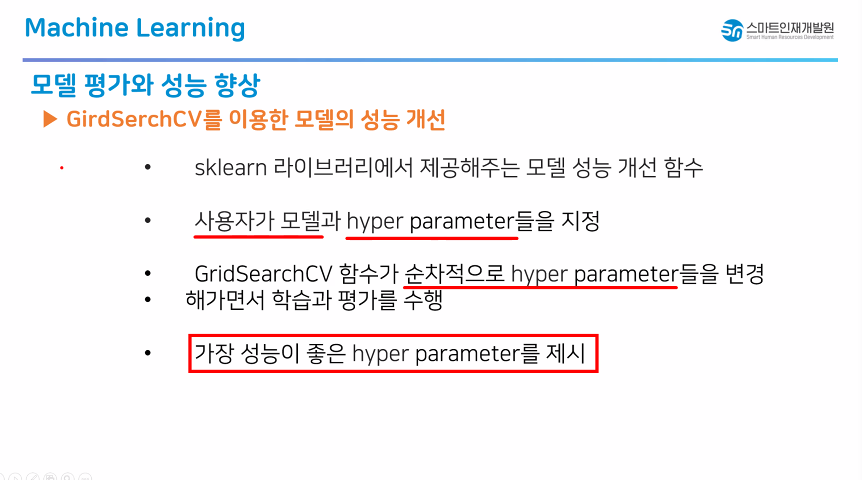

In [166]:
# 그리드서치 도구 불러오기~
from sklearn.model_selection import GridSearchCV
# 교차검증을 하면서 그리드서치를 진행 -> 최적화된 하이퍼파라미터를 찾는다

In [168]:
# 1. 하이퍼파라미터들의 경우의수를 지정
params = {'n_estimators':[50,100,200],
         'max_depth':[3,5,7],
         'max_leaf_nodes':[2,4,6],
          'min_samples_split':[3,5,7]
         }
# 2. 대상 모델 선정
model=RandomForestClassifier(random_state=18)

#3. 대상모델에게 그리드서치 적용하기!
grid=GridSearchCV(model, params, cv=5,scoring='accuracy')

# 4. 적용
grid.fit(onehot_X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=18),
             param_grid={'max_depth': [3, 5, 7], 'max_leaf_nodes': [2, 4, 6],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# 경우의 수가 많을수록 시간이 오래걸림

In [170]:
# 베스트 파라미터 확인
print("최적의 하이퍼파라미터:", grid.best_params_)
print("최적의 정확도: ", grid.best_score_)

최적의 하이퍼파라미터: {'max_depth': 5, 'max_leaf_nodes': 6, 'min_samples_split': 3, 'n_estimators': 200}
최적의 정확도:  0.8192831586215554


In [173]:
# 최적의 하이퍼파라미터 조합으로 다시 모델링
# 모델객체생성 -> 하이퍼파라미터 조절
rf_model = RandomForestClassifier(n_estimators=200,
                                   max_depth=5,
                                   max_leaf_nodes=6,
                                   min_samples_split=3)
# 모델학습
rf_model.fit(onehot_X_train, y_train)
# 모델예측
rf_model.predict(onehot_X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,